In [1]:
import numpy as np
import math
import json
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# loss per epoch on the ResNet7_Mar20 model
# trained on 300k inputs
# no validation
# no early stopping, exhausted 50 epochs

trainloss_ResNet7_Mar20 = np.load(
    "/content/drive/MyDrive/ResNet7_Mar20/losses_per_epoch_ResNet7_50epoch.npz"
    )['X']

In [5]:
# loss per epoch of the ResNet7_Mar23 model
# trained on 300k inputs
# 10k validation
# early stopping on validation loss, stopped at 13 epochs

trainloss_ResNet7_Mar23 = []
valloss_ResNet7_Mar23 = []
lr_ResNet7_Mar23 = []
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/ResNet7_Mar23/losses_per_epoch_ResNet7_epoch{}.npz".format(i))
    trainloss_ResNet7_Mar23.extend(losses['train_loss'])
    valloss_ResNet7_Mar23.extend(losses['val_loss'])
    lr_ResNet7_Mar23.extend(losses['lr'])
  except:
    continue

In [3]:
# loss per epoch of the ResNet7_Mar26 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets
# early stopping on validation loss, stopped at 20 epochs

trainloss_ResNet7_Mar26 = []
valloss_ResNet7_Mar26 = []
lr_ResNet7_Mar26 = []
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/ResNet7_Mar26/ResNet7_Mar27_losses_per_epoch_epoch{}.npz".format(i))
    trainloss_ResNet7_Mar26.extend(losses['train_loss'])
    valloss_ResNet7_Mar26.extend(losses['val_loss'])
    lr_ResNet7_Mar26.extend(losses['lr'])
  except:
    continue

In [6]:
# loss per epoch of the ResNet13_Mar28 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets
# early stopping on validation loss, stopped at 19 epochs

trainloss_ResNet13_Mar28 = []
valloss_ResNet13_Mar28 = []
lr_ResNet13_Mar28 = []
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/ResNet13_Mar28/ResNet13_Mar28_losses_per_epoch_epoch{}.npz".format(i))
    trainloss_ResNet13_Mar28.extend(losses['train_loss'])
    valloss_ResNet13_Mar28.extend(losses['val_loss'])
    lr_ResNet13_Mar28.extend(losses['lr'])
  except:
    continue

In [ ]:
# loss per epoch of the PlainNet7_Mar28 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets
# early stopping on validation loss, stopped at 20 epochs

trainloss_PlainNet7_Mar28 = []
valloss_PlainNet7_Mar28 = []
lr_PlainNet7_Mar28 = []
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/PlainNet7_Mar28/PlainNet7_Mar28_losses_per_epoch_epoch{}.npz".format(i))
    trainloss_PlainNet7_Mar28.extend(losses['train_loss'])
    valloss_PlainNet7_Mar28.extend(losses['val_loss'])
    lr_PlainNet7_Mar28.extend(losses['lr'])
  except:
    continue

In [ ]:
# loss per epoch of the PlainNet13_Mar28 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets
# early stopping on validation loss, stopped at 20 epochs

trainloss_PlainNet13_Mar28 = []
valloss_PlainNet13_Mar28 = []
lr_PlainNet13_Mar28 = []
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/PlainNet13_Mar28/PlainNet13_Mar28_losses_per_epoch_epoch{}.npz".format(i))
    trainloss_PlainNet13_Mar28.extend(losses['train_loss'])
    valloss_PlainNet13_Mar28.extend(losses['val_loss'])
    lr_PlainNet13_Mar28.extend(losses['lr'])
  except:
    continue

Text(0.5, 0.98, 'Impact of data quality to the training')

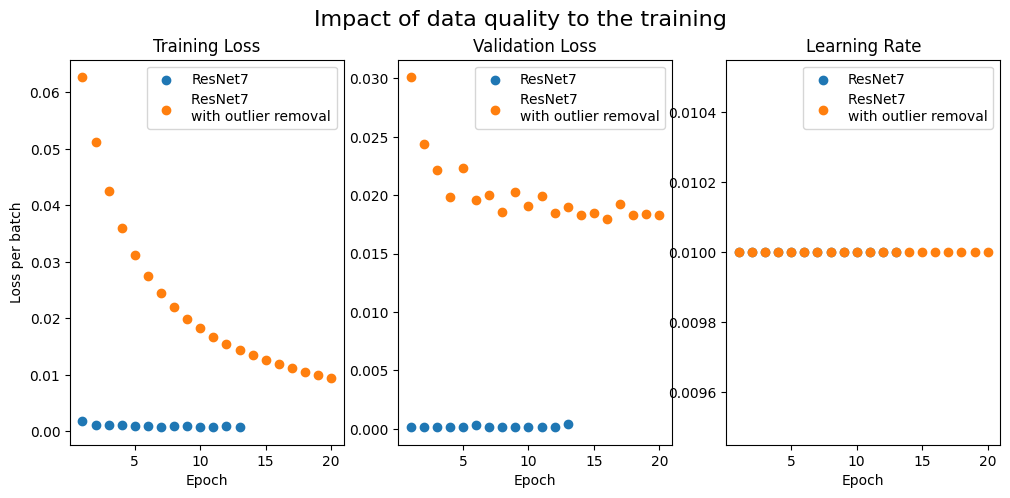

In [26]:
train_loss_lists = {
    'ResNet7': trainloss_ResNet7_Mar23,
    'ResNet7 \nwith outlier removal': trainloss_ResNet7_Mar26,
    }
val_loss_lists = {
    'ResNet7': valloss_ResNet7_Mar23,
    'ResNet7 \nwith outlier removal': valloss_ResNet7_Mar26,
}
lr_lists = {
    'ResNet7': lr_ResNet7_Mar23,
    'ResNet7 \nwith outlier removal': lr_ResNet7_Mar26,
    }

# plot loss per epoch
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for name, data in train_loss_lists.items():
  axs[0].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss per batch")
axs[0].set_title("Training Loss")
axs[0].legend()
for name, data in val_loss_lists.items():
  axs[1].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[1].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[1].set_title("Validation Loss")
axs[1].legend()
for name, data in lr_lists.items():
  axs[2].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[2].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[2].set_title("Learning Rate")
axs[2].legend()
fig.suptitle("Impact of data quality to the training", fontsize=16)

Text(0.5, 0.98, 'Training and Validation Metrics for Residual Networks')

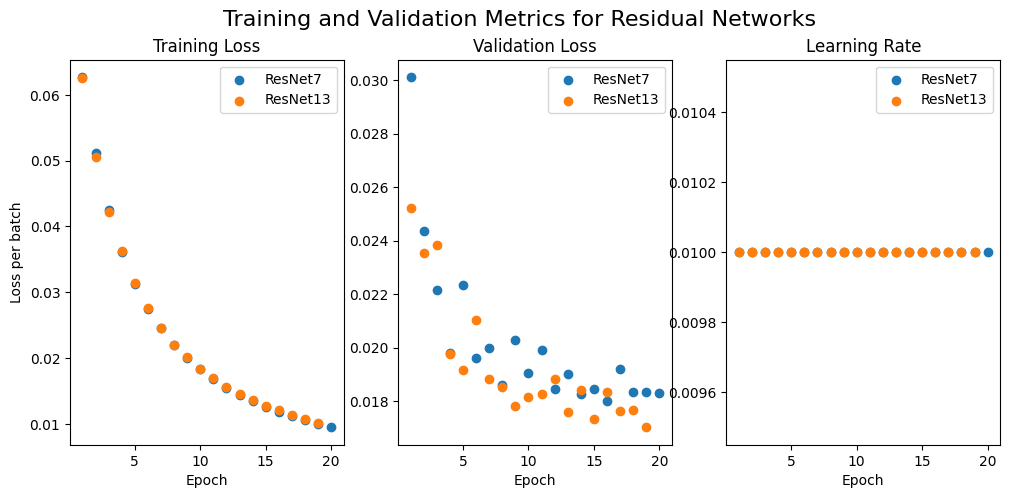

In [22]:
train_loss_lists = {
    # 'ResNet7_Mar20': trainloss_ResNet7_Mar20,
    # 'ResNet7_Mar23': trainloss_ResNet7_Mar23,
    'ResNet7': trainloss_ResNet7_Mar26,
    'ResNet13': trainloss_ResNet13_Mar28,
    # 'PlainNet7_Mar28': trainloss_PlainNet7_Mar28,
    # 'PlainNet13_Mar28': trainloss_PlainNet13_Mar28
    }
val_loss_lists = {
    # valloss_ResNet7_Mar23,
    'ResNet7': valloss_ResNet7_Mar26,
    'ResNet13': valloss_ResNet13_Mar28,
    # valloss_PlainNet7_Mar28,
    # valloss_PlainNet13_Mar28
}
lr_lists = {
    # lr_ResNet7_Mar23,
    'ResNet7': lr_ResNet7_Mar26,
    'ResNet13': lr_ResNet13_Mar28,
    # lr_PlainNet7_Mar28,
    # lr_PlainNet13_Mar28
    }

# plot loss per epoch
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for name, data in train_loss_lists.items():
  axs[0].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss per batch")
axs[0].set_title("Training Loss")
axs[0].legend()
for name, data in val_loss_lists.items():
  axs[1].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[1].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[1].set_title("Validation Loss")
axs[1].legend()
for name, data in lr_lists.items():
  axs[2].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[2].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[2].set_title("Learning Rate")
axs[2].legend()
fig.suptitle("Training and Validation Metrics for Residual Networks", fontsize=16)

In [12]:
# loss per epoch of the PlainNet1_Mar31 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets

trainloss_PlainNet1_Mar31 = []
valloss_PlainNet1_Mar31 = []
lr_PlainNet1_Mar31 = []
# losses = np.load("/content/drive/MyDrive/PlainNet1_Mar31/PlainNet1_Mar31_losses_per_epoch_epoch28.npz")
# trainloss_PlainNet1_Mar31.extend(losses['train_loss'])
# valloss_PlainNet1_Mar31.extend(losses['val_loss'])
# lr_PlainNet1_Mar31.extend(losses['lr'])
for i in range(50):
  try:
    losses = np.load("/content/drive/MyDrive/PlainNet1_Mar31/PlainNet1_Mar31_losses_per_epoch_epoch{}.npz".format(i))
    trainloss_PlainNet1_Mar31.extend(losses['train_loss'])
    valloss_PlainNet1_Mar31.extend(losses['val_loss'])
    lr_PlainNet1_Mar31.extend(losses['lr'])
  except:
    continue

In [17]:
# loss per epoch of the PlainNet3_Apr1 model
# trained on 1M inputs
# 100k validation
# outlier removal on both training and validation sets

trainloss_PlainNet3_Apr1 = []
valloss_PlainNet3_Apr1 = []
lr_PlainNet3_Apr1 = []
losses = np.load("/content/drive/MyDrive/PlainNet3_Apr1/PlainNet3_Apr1_losses_per_epoch_epoch10.npz")
trainloss_PlainNet3_Apr1.extend(losses['train_loss'])
valloss_PlainNet3_Apr1.extend(losses['val_loss'])
lr_PlainNet3_Apr1.extend(losses['lr'])
# for i in range(50):
#   try:
#     losses = np.load("/content/drive/MyDrive/PlainNet3_Apr1/PlainNet3_Apr1_losses_per_epoch_epoch{}.npz".format(i))
#     trainloss_PlainNet3_Apr1.extend(losses['train_loss'])
#     valloss_PlainNet3_Apr1.extend(losses['val_loss'])
#     lr_PlainNet3_Apr1.extend(losses['lr'])
#   except:
#     continue

Text(0.5, 0.98, 'Training and Validation Metrics for Plain Networks')

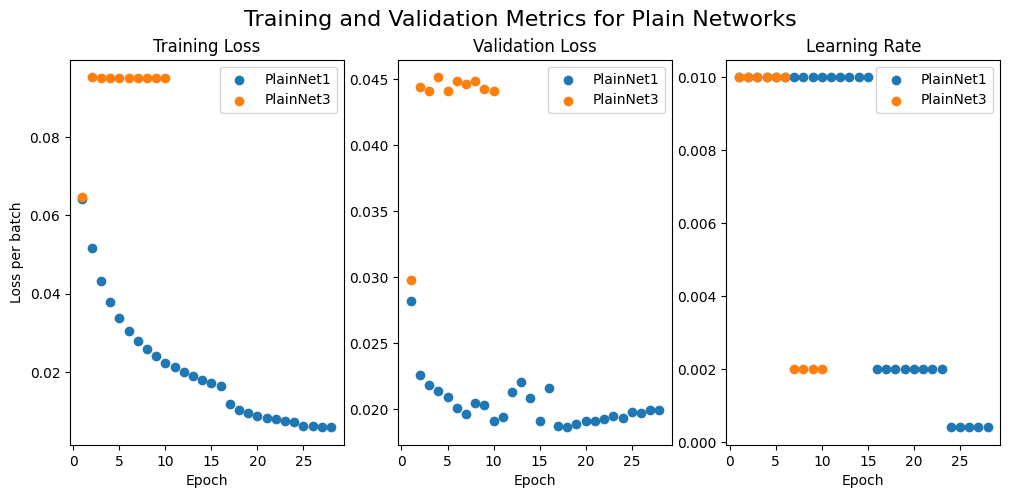

In [21]:
train_loss_lists = {
    'PlainNet1': trainloss_PlainNet1_Mar31,
    'PlainNet3': trainloss_PlainNet3_Apr1,
    }
val_loss_lists = {
    'PlainNet1': valloss_PlainNet1_Mar31,
    'PlainNet3': valloss_PlainNet3_Apr1,
}
lr_lists = {
    'PlainNet1': lr_PlainNet1_Mar31,
    'PlainNet3': lr_PlainNet3_Apr1,
    }

# plot loss per epoch
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for name, data in train_loss_lists.items():
  axs[0].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss per batch")
axs[0].set_title("Training Loss")
axs[0].legend()
for name, data in val_loss_lists.items():
  axs[1].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[1].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[1].set_title("Validation Loss")
axs[1].legend()
for name, data in lr_lists.items():
  axs[2].scatter([e for e in range(1, len(data)+1)], data, label=name)
axs[2].set_xlabel("Epoch")
# axs[1].set_ylabel("Loss per batch")
axs[2].set_title("Learning Rate")
axs[2].legend()
fig.suptitle("Training and Validation Metrics for Plain Networks", fontsize=16)